In [17]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn import datasets
from sklearn import preprocessing
import pylab as pl
from sklearn import decomposition
import seaborn as sns
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.cluster import AgglomerativeClustering
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

import scipy.cluster.hierarchy as hc

from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_samples, silhouette_score


In [14]:
tfidf_df = pd.read_csv("tfidf_vectorized_dataset.csv")

In [15]:
tfidf_df.head()

,aaa,aaaacccdfghi,aaib,aam,aap,aapi,aarhus,aaron,aas,aau,...,zuckermusk,zuckermuskian,zuckerschmuck,zucks,zumbi,zurdo,zvakada,zygote,zygotes,Label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Free Speech
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Free Speech
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Mixed Opinions
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Hate Speech Regulation
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Hate Speech Regulation


In [24]:
df_unlabeled = tfidf_df.drop(columns=["Label"])
df_normalized = preprocessing.normalize(df_unlabeled)


In [18]:
My_KMean= KMeans(n_clusters=3)
My_KMean.fit(df_unlabeled)
My_labels=My_KMean.predict(df_unlabeled)
print("Silhouette Score for k=3: ", silhouette_score(df_unlabeled, My_labels))


Silhouette Score for k=3:  0.007994015840946304


In [20]:
My_KMean2= KMeans(n_clusters=4).fit(preprocessing.normalize(df_unlabeled))
My_KMean2.fit(df_unlabeled)
My_labels2=My_KMean2.predict(df_unlabeled)
print("Silhouette Score for k=4: ", silhouette_score(df_unlabeled, My_labels2))

Silhouette Score for k=4:  0.01013001968683713


In [22]:
My_KMean3= KMeans(n_clusters=5).fit(preprocessing.normalize(df_unlabeled))
My_KMean3.fit(df_unlabeled)
My_labels3=My_KMean3.predict(df_unlabeled)
print("Silhouette Score for k=4: ", silhouette_score(df_unlabeled, My_labels3))

Silhouette Score for k=4:  0.010748234788673082


In [25]:
k_values = [3, 4, 5]
silhouette_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42).fit(df_normalized)
    my_labels = kmeans.predict(df_normalized)
    sil_score = silhouette_score(df_normalized, my_labels)
    silhouette_scores.append(sil_score)
    print(f"K={k}, Silhouette Score: {sil_score:.4f}")


K=3, Silhouette Score: 0.0111
K=4, Silhouette Score: 0.0113
K=5, Silhouette Score: 0.0131


K=3, Silhouette Score: 0.1702
K=4, Silhouette Score: -0.0270
K=5, Silhouette Score: -0.0240


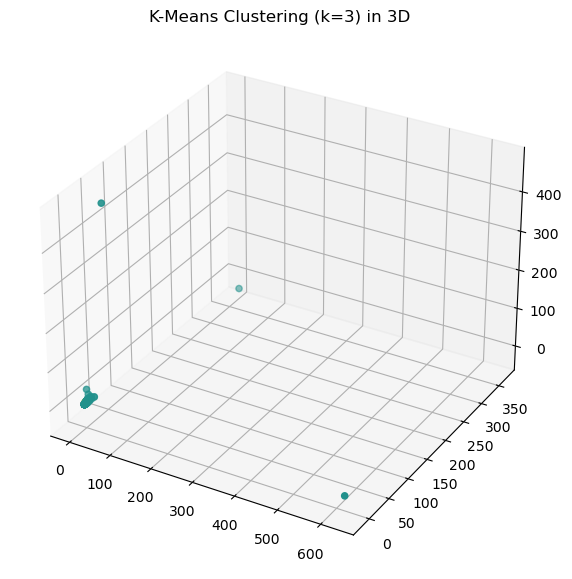

In [11]:
k_values = [3, 4, 5]
silhouette_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(df_scaled)
    sil_score = silhouette_score(df_scaled, cluster_labels)
    silhouette_scores.append(sil_score)
    print(f"K={k}, Silhouette Score: {sil_score:.4f}")

# Choose the best k (highest silhouette score)
best_k = k_values[np.argmax(silhouette_scores)]
kmeans_final = KMeans(n_clusters=best_k, random_state=42)
tfidf_df['KMeans_Cluster'] = kmeans_final.fit_predict(df_scaled)

# PCA for Visualization (Reduce to 3D)
pca = PCA(n_components=3)
df_pca = pca.fit_transform(df_scaled)
df_pca = pd.DataFrame(df_pca, columns=['PC1', 'PC2', 'PC3'])
df_pca['Cluster'] = tfidf_df['KMeans_Cluster']

# 3D Visualization of Clusters
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(df_pca['PC1'], df_pca['PC2'], df_pca['PC3'], c=df_pca['Cluster'], cmap='viridis')
plt.title(f"K-Means Clustering (k={best_k}) in 3D")
plt.show()

In [12]:
tfidf_df.head()

,aaa,aaaacccdfghi,aaib,aam,aap,aapi,aarhus,aaron,aas,aau,...,zuckermuskian,zuckerschmuck,zucks,zumbi,zurdo,zvakada,zygote,zygotes,Label,KMeans_Cluster
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Free Speech,1
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Free Speech,1
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Mixed Opinions,1
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Hate Speech Regulation,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Hate Speech Regulation,1


In [13]:
print(tfidf_df['KMeans_Cluster'].value_counts())  # Should only show counts for [0,1,2]


KMeans_Cluster
1    824
2      1
0      1
Name: count, dtype: int64


# Trying K-Means Clustering With Different Vectorized Data

In [34]:
def vectorize_text(df, method="count", max_features=5000, ngram_range=(1,2), min_df=2, max_df=0.95):
    """
    Converts text to numerical vectors using either CountVectorizer or TfidfVectorizer.
    
    Parameters:
        df (pd.DataFrame): DataFrame with 'Content' column.
        method (str): "count" for CountVectorizer, "tfidf" for TfidfVectorizer.
        max_features (int): Maximum number of features to keep.
        ngram_range (tuple): The range of n-grams to consider.
        min_df (int): Ignore words that appear in fewer than 'min_df' documents.
        max_df (float): Ignore words that appear in more than 'max_df' proportion of documents.
        
    Returns:
        pd.DataFrame: DataFrame with vectorized features.
    """
    if method == "count":
        vectorizer = CountVectorizer(max_features=max_features, ngram_range=ngram_range, min_df=min_df, max_df=max_df)
    else:
        vectorizer = TfidfVectorizer(max_features=max_features, ngram_range=ngram_range, min_df=min_df, max_df=max_df, stop_words=["description","available"])
    
    # Fit and transform the text
    text_matrix = vectorizer.fit_transform(df["Content"])
    
    # Convert to DataFrame
    feature_names = vectorizer.get_feature_names_out()
    vectorized_df = pd.DataFrame(text_matrix.toarray(), columns=feature_names)
    
    return vectorized_df


In [35]:
cleaned_df = pd.read_csv("cleaned_dataframes/cleaned_merged_df.csv").reset_index(drop=True)

In [36]:
cleaned_df.head()

,Unnamed: 0,Label,Content
0,0,Free Speech,social media brands achieve relevant different...
1,1,Free Speech,downloads trump vpns everything know potential...
2,2,Mixed Opinions,water cooler brown thrasher wannagan creek cab...
3,3,Hate Speech Regulation,misinformation business meta musk endanger dem...
4,4,Hate Speech Regulation,elon musk elevating trump foreign policy delib...


In [37]:
cleaned_df = cleaned_df.drop(columns=["Unnamed: 0"])

In [38]:
cleaned_df.head()

,Label,Content
0,Free Speech,social media brands achieve relevant different...
1,Free Speech,downloads trump vpns everything know potential...
2,Mixed Opinions,water cooler brown thrasher wannagan creek cab...
3,Hate Speech Regulation,misinformation business meta musk endanger dem...
4,Hate Speech Regulation,elon musk elevating trump foreign policy delib...


In [39]:
cleaned_df.shape

(826, 2)

In [40]:
vectorized_df = vectorize_text(cleaned_df, method="tfidf", max_features=5000, ngram_range=(1,2), min_df=2, max_df=0.95)

In [41]:
vectorized_df.head()

,abandon,abandoned,ability,able,abortion,absence,absolute,absolute free,absolutely,absolutist,...,york times,young,younger,youth,youtube,youtube youtube,zealand,zero,zuck,zuckerberg
0,0.017334,0.0,0.018981,0.000000,0.000000,0.0,0.012921,0.0,0.0,0.0,...,0.015439,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.012563
1,0.000000,0.0,0.000000,0.131237,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2,0.000000,0.0,0.000000,0.000000,0.022821,0.0,0.000000,0.0,0.0,0.0,...,0.012144,0.0,0.011612,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
3,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
4,0.000000,0.0,0.020380,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.053954


In [42]:
vectorized_df.to_csv("tfidf_dataframes/tfidf_vectorized_dataset2.csv", index=False)

In [43]:
kmeans_df = pd.read_csv("tfidf_dataframes/tfidf_vectorized_dataset2.csv")


In [44]:
print(kmeans_df.isnull().sum().sum())  # Should output 0


0


In [45]:
print(kmeans_df.shape)  # Should output (2225, 5000)

(826, 5000)


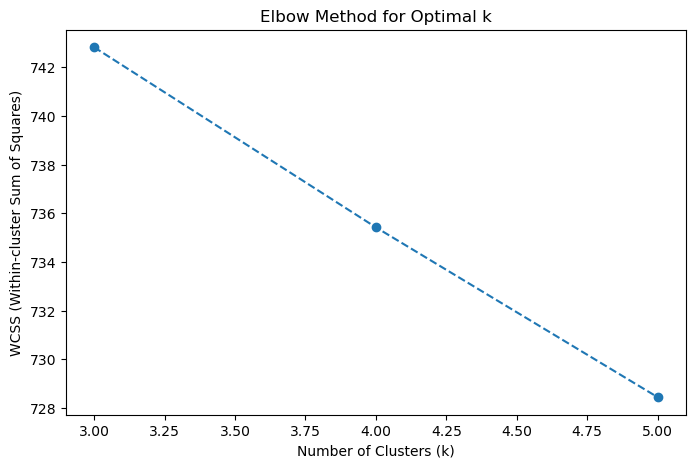

In [46]:
wcss = []  # Within-cluster sum of squares
k_values = [3,4,5]  # Testing k from 2 to 9

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(kmeans_df)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(k_values, wcss, marker="o", linestyle="--")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("WCSS (Within-cluster Sum of Squares)")
plt.title("Elbow Method for Optimal k")
plt.show()

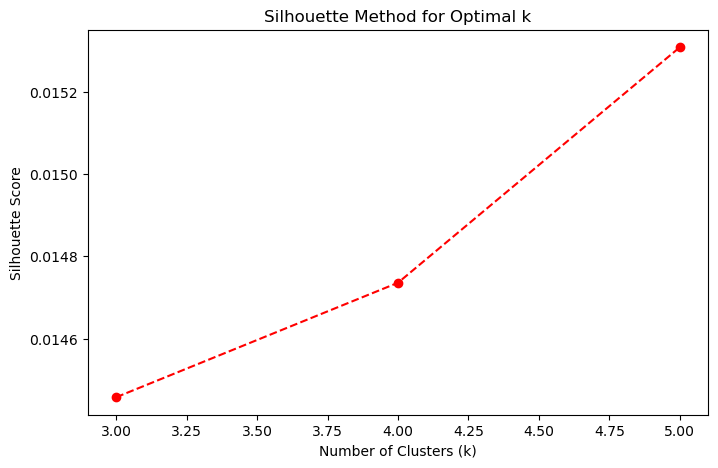

In [47]:
sil_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(kmeans_df)
    silhouette_avg = silhouette_score(kmeans_df, cluster_labels)
    sil_scores.append(silhouette_avg)

# Plot Silhouette Scores
plt.figure(figsize=(8, 5))
plt.plot(k_values, sil_scores, marker="o", linestyle="--", color="red")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Method for Optimal k")
plt.show()

In [48]:
best_k = 4  # Replace with the optimal k from your analysis

kmeans = KMeans(n_clusters=best_k, random_state=42, n_init=10)
kmeans_df["Cluster"] = kmeans.fit_predict(kmeans_df)
cleaned_df["Cluster"] = kmeans.labels_


# Show how many texts are in each cluster
print(kmeans_df["Cluster"].value_counts())
print(cleaned_df["Cluster"].value_counts())

Cluster
3    307
2    272
1    213
0     34
Name: count, dtype: int64
Cluster
3    307
2    272
1    213
0     34
Name: count, dtype: int64


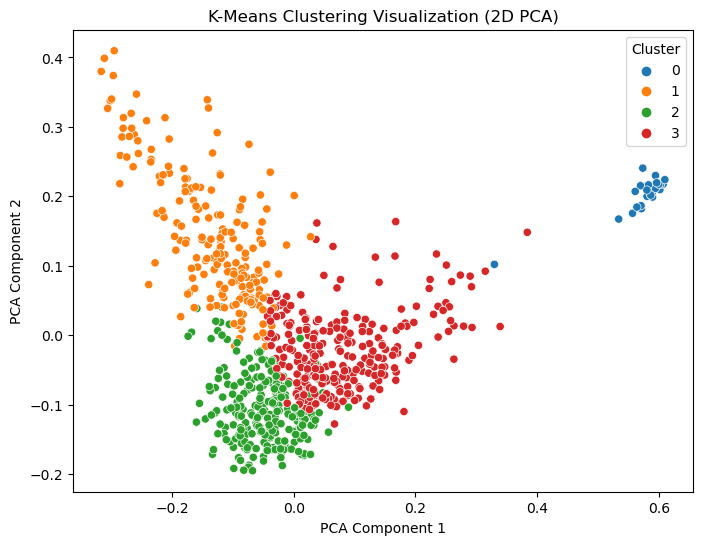

In [49]:
pca = PCA(n_components=2, random_state=42)
tfidf_2d = pca.fit_transform(kmeans_df.drop(columns=["Cluster"]))

plt.figure(figsize=(8, 6))
sns.scatterplot(x=tfidf_2d[:, 0], y=tfidf_2d[:, 1], hue=kmeans_df["Cluster"], palette="tab10")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("K-Means Clustering Visualization (2D PCA)")
plt.legend(title="Cluster")
plt.show()

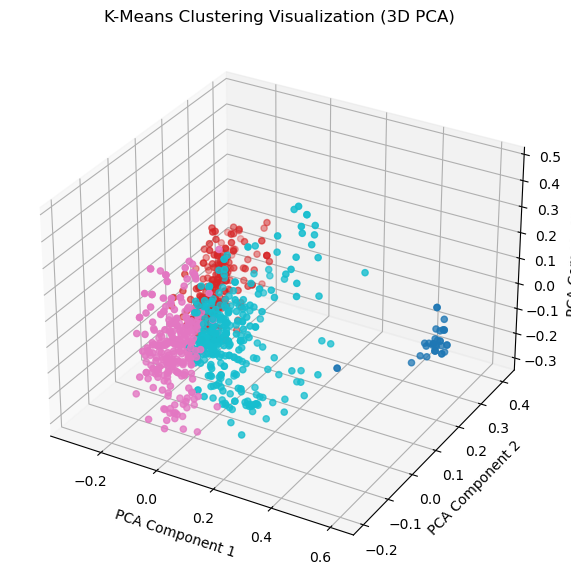

In [50]:
from mpl_toolkits.mplot3d import Axes3D

pca_3d = PCA(n_components=3, random_state=42)
tfidf_3d = pca_3d.fit_transform(kmeans_df.drop(columns=["Cluster"]))

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection="3d")

ax.scatter(tfidf_3d[:, 0], tfidf_3d[:, 1], tfidf_3d[:, 2], c=kmeans_df["Cluster"], cmap="tab10")
ax.set_xlabel("PCA Component 1")
ax.set_ylabel("PCA Component 2")
ax.set_zlabel("PCA Component 3")
ax.set_title("K-Means Clustering Visualization (3D PCA)")
plt.show()

# Interpretting Clusters

In [51]:
top_words_per_cluster = kmeans_df.groupby("Cluster").mean()

# Get the top N words for each cluster
top_n = 10  # Number of top words to display
for cluster in range(kmeans_df["Cluster"].nunique()):
    print(f"\nTop {top_n} words in Cluster {cluster}:")
    print(top_words_per_cluster.iloc[cluster].sort_values(ascending=False).head(top_n))


Top 10 words in Cluster 0:
launches     0.208457
google       0.192486
tiktok       0.180679
ads          0.161664
meta         0.157967
feature      0.139343
instagram    0.130431
youtube      0.125613
updates      0.120053
marketing    0.105410
Name: 0, dtype: float64

Top 10 words in Cluster 1:
speech          0.157029
free speech     0.098794
free            0.089931
government      0.063305
media           0.054913
companies       0.052612
censorship      0.051272
social          0.048556
social media    0.047331
right           0.045627
Name: 1, dtype: float64

Top 10 words in Cluster 2:
trump        0.057545
think        0.044270
political    0.028868
even         0.028295
really       0.026961
right        0.026759
subreddit    0.025589
see          0.025430
say          0.024374
want         0.024077
Name: 2, dtype: float64

Top 10 words in Cluster 3:
media           0.054177
social          0.053031
content         0.052792
tiktok          0.051974
social media    0.051871
u

In [53]:
# Cross-tabulation of clusters vs. original labels
label_cluster_counts = pd.crosstab(cleaned_df["Cluster"], cleaned_df["Label"])
label_cluster_counts

Label,Free Speech,Hate Speech Regulation,Mixed Opinions,Neutral Discussion
Cluster,,,,
0,0,34,0,0
1,116,27,45,25
2,40,38,144,50
3,47,155,30,75


In [55]:
cleaned_df.rename(columns={"Cluster": "Cluster (K-means)"}, inplace=True)

In [56]:
cleaned_df.head()

,Label,Content,Cluster (K-means)
0,Free Speech,social media brands achieve relevant different...,3
1,Free Speech,downloads trump vpns everything know potential...,3
2,Mixed Opinions,water cooler brown thrasher wannagan creek cab...,2
3,Hate Speech Regulation,misinformation business meta musk endanger dem...,3
4,Hate Speech Regulation,elon musk elevating trump foreign policy delib...,2


In [57]:
cleaned_df.to_csv("cleaned_dataframes/cleaned_merged_df_with_kmeans_clusters.csv", index=False)

In [59]:
kmeans_df.to_csv("tfidf_dataframes/tfidf_vectorized_dataset_with_kmeans_clusters.csv", index=False)